In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import os
import sys
module_path = os.path.abspath('src')
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/ilya/Documents/kaggle_data-science-bowl-2018/src


In [16]:
import data
from metrics import mean_iou, jacard_coef, dice_coef
import config
params = config.devbox

In [4]:
from keras.models import load_model

In [7]:
!ls /home/ilya/Data/bowl2018/output/unet--1518151545

weights-improvement-01-0.73.hdf5  weights-improvement-23-0.74.hdf5
weights-improvement-02-0.73.hdf5  weights-improvement-24-0.74.hdf5
weights-improvement-03-0.74.hdf5  weights-improvement-25-0.75.hdf5
weights-improvement-10-0.74.hdf5  weights-improvement-26-0.75.hdf5
weights-improvement-11-0.74.hdf5  weights-improvement-27-0.75.hdf5
weights-improvement-12-0.74.hdf5  weights-improvement-28-0.75.hdf5
weights-improvement-13-0.74.hdf5  weights-improvement-29-0.75.hdf5
weights-improvement-22-0.74.hdf5


In [14]:
model = load_model('/home/ilya/Data/bowl2018/output/unet--1518151545/weights-improvement-26-0.75.hdf5', {'mean_iou': mean_iou, 'dice_coef': dice_coef})

In [17]:
train_gen, val_gen = data.make_train_generator(params)

  0%|          | 0/536 [00:00<?, ?it/s]

Loading data
Find 670 train_ids


100%|██████████| 134/134 [00:07<00:00, 17.40it/s]


Data loaded


In [35]:
d = next(train_gen)

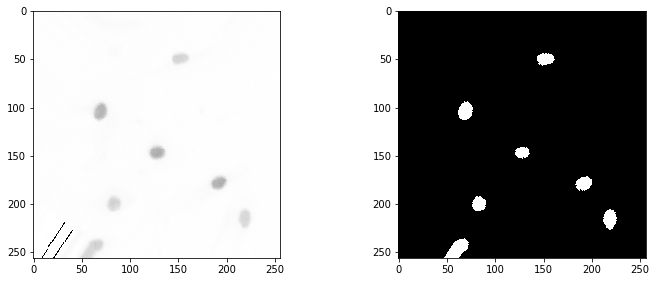

In [134]:
i = 14
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.imshow(d[0][i])
plt.subplot(222)
plt.imshow(d[1][i].reshape((256,256)), cmap='gray')

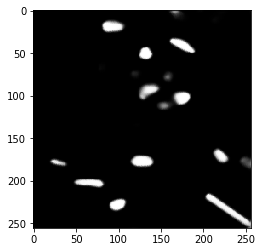

In [133]:
mask = model.predict(d[0][i].reshape(1,256,256,3))
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

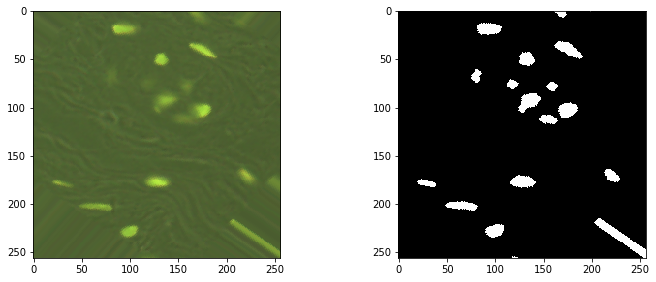

In [132]:
i = 13
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.imshow(d[0][i])
plt.subplot(222)
plt.imshow(d[1][i].reshape((256,256)), cmap='gray')

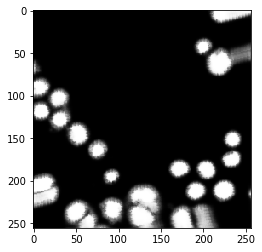

In [131]:
mask = model.predict(d[0][i].reshape(1,256,256,3))
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

In [85]:
test_paths = data.make_test_df(params)
test_imgs = data.read_resize_images(test_paths)

  9%|▉         | 6/65 [00:00<00:01, 56.00it/s]

Find 65 test_ids


100%|██████████| 65/65 [00:01<00:00, 54.86it/s]


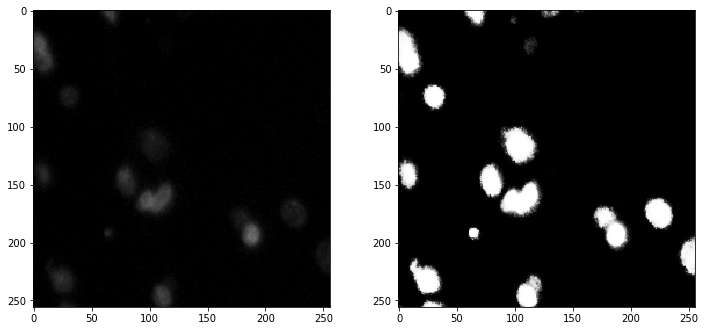

In [130]:
i = 11
mask = model.predict(test_imgs[i].reshape(1,256,256,3))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(test_imgs[i])
plt.subplot(222)
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

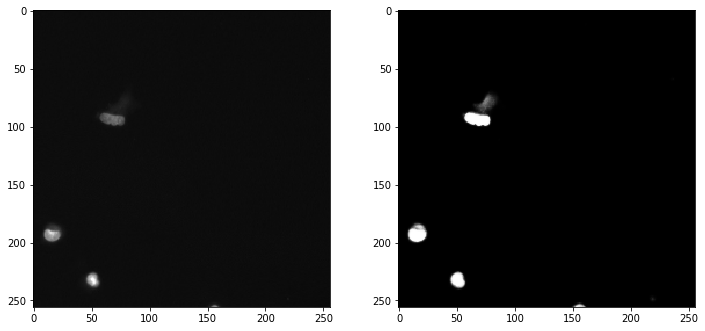

In [129]:
i = 20
mask = model.predict(test_imgs[i].reshape(1,256,256,3))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(test_imgs[i])
plt.subplot(222)
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

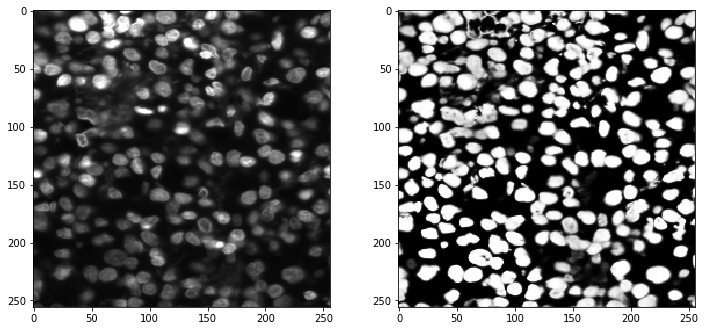

In [128]:
i = 14
mask = model.predict(test_imgs[i].reshape(1,256,256,3))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(test_imgs[i])
plt.subplot(222)
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

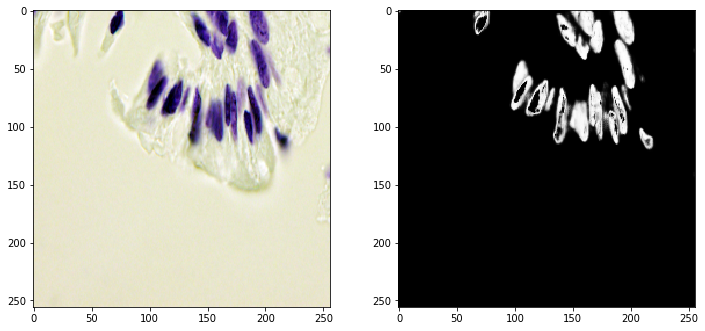

In [127]:
i = 4
mask = model.predict(test_imgs[i].reshape(1,256,256,3))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(test_imgs[i])
plt.subplot(222)
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

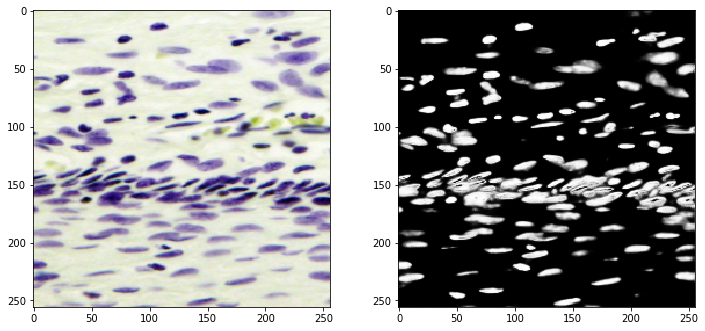

In [126]:
i = 50
mask = model.predict(test_imgs[i].reshape(1,256,256,3))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(test_imgs[i])
plt.subplot(222)
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

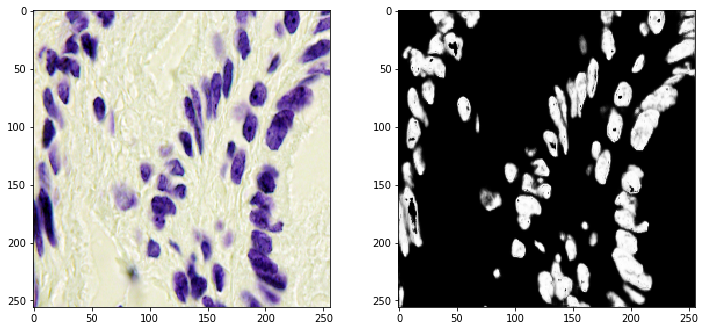

In [125]:
i = 48
mask = model.predict(test_imgs[i].reshape(1,256,256,3))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(test_imgs[i])
plt.subplot(222)
plt.imshow(mask[0].reshape((256,256)), cmap='gray')

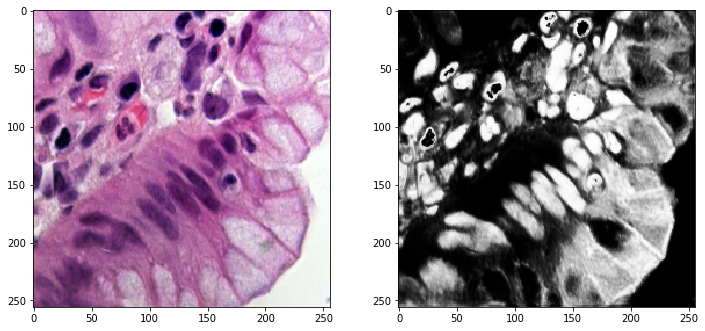

In [124]:
i = 37
mask = model.predict(test_imgs[i].reshape(1,256,256,3))

plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(test_imgs[i])
plt.subplot(222)
plt.imshow(mask[0].reshape((256,256)), cmap='gray')